In [1]:
import pandas as pd
from turtleIsolationForests.isolationForest import IsolationForest
from sklearn.preprocessing import StandardScaler

In [2]:
dataframe = pd.read_csv("./data_OHE.csv", index_col=0)
dataframe

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [3]:
test_dataframe = pd.read_csv("./test_data_OHE.csv", index_col=0)
test_dataframe

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [4]:
train_labels = dataframe.xs('class_normal', axis='columns')

for column in dataframe.columns:
    if (column[0:6] == 'class_'):
        dataframe.drop(column, axis='columns', inplace=True)

test_labels = test_dataframe.xs('class_normal', axis='columns')

for column in test_dataframe.columns:
    if (column[0:6] == 'class_'):
        test_dataframe.drop(column, axis='columns', inplace=True)

In [5]:
X_train = dataframe
X_test = test_dataframe

In [6]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.265429,0.476175,-0.367555,-0.038557,-0.02408,-0.083005,-0.003985,-0.087401,-0.075287,-0.076556,...,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387
1,-0.265429,-2.100067,2.720684,-0.038557,-0.02408,-0.083005,-0.003985,-0.087401,-0.075287,-0.076556,...,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
2,-0.265429,0.476175,-0.367555,-0.038557,-0.02408,-0.083005,-0.003985,-0.087401,-0.075287,-0.076556,...,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
3,-0.265429,0.476175,-0.367555,-0.038557,-0.02408,-0.083005,-0.003985,-0.087401,-0.075287,-0.076556,...,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084
4,-0.265429,0.476175,-0.367555,-0.038557,-0.02408,-0.083005,-0.003985,-0.087401,-0.075287,-0.076556,...,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.265429,0.476175,-0.367555,-0.038557,-0.02408,-0.083005,-0.003985,-0.087401,-0.075287,-0.076556,...,0.734343,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
125969,-0.265429,-2.100067,2.720684,-0.038557,-0.02408,-0.083005,-0.003985,-0.087401,-0.075287,-0.076556,...,0.734343,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
125970,-0.265429,0.476175,-0.367555,-0.038557,-0.02408,-0.083005,-0.003985,-0.087401,-0.075287,-0.076556,...,0.734343,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387
125971,-0.265429,0.476175,-0.367555,-0.038557,-0.02408,-0.083005,-0.003985,-0.087401,-0.075287,-0.076556,...,0.734343,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387


In [7]:
contamination = sum(train_labels == 0) / len(train_labels)
contamination

0.4654171925730117

In [8]:
model = IsolationForest(contamination = contamination, random_state = None)
model.fit(X_train)
model

In [9]:
model.threshold

0.36008403544982176

In [10]:
predictions = model.predict(X_test)

In [11]:
predictions['is_normal'] = test_labels
predictions

,anomaly_score,predicted_as_anomaly,is_normal
0,0.379847,True,0.0
1,0.380095,True,0.0
2,0.349118,False,1.0
3,0.378054,True,0.0
4,0.395122,True,0.0
...,...,...,...
22539,0.347678,False,1.0
22540,0.346420,False,1.0
22541,0.376192,True,0.0
22542,0.362166,True,1.0


In [12]:
true_anomaly = len(predictions[predictions['is_normal'] == 0 & (predictions['predicted_as_anomaly'] == True)])
false_anomaly = len(predictions[predictions['is_normal'] == 0 & (predictions['predicted_as_anomaly'] == False)])
false_normal = len(predictions[predictions['is_normal'] == 1 & (predictions['predicted_as_anomaly'] == True)])
true_normal = len(predictions[predictions['is_normal'] == 1 & (predictions['predicted_as_anomaly'] == False)])

precision = true_anomaly / (true_anomaly + false_anomaly)
recall = true_anomaly / (true_anomaly + false_normal)
f1 = 2 * precision * recall / (precision + recall)

print("precision: " + str(precision))
print("recall: " + str(recall))
print("f1-score: " + str(f1))

precision: 0.5
recall: 0.7272881836214224
f1-score: 0.5925977234420817


In [13]:
predicted_list = list(predictions["predicted_as_anomaly"])
test_list = list(predictions["is_normal"])

In [14]:
print(predictions["anomaly_score"])

0        0.379847
1        0.380095
2        0.349118
3        0.378054
4        0.395122
           ...   
22539    0.347678
22540    0.346420
22541    0.376192
22542    0.362166
22543    0.398120
Name: anomaly_score, Length: 22544, dtype: float64


In [15]:
model.threshold

0.36008403544982176

In [16]:
"""
Questions:
How do we obtain "windows" from our datasets?
What should k be for our data? Look at paper
How do we obtain our threshold? It would be a line between the average True point and average False point
"""

def pak(anomaly_segment_list, ground_truth, threshold,  k):
    allAboveThreshold = True

    for item in anomaly_segment_list:
        if item <= threshold:
            allAboveThreshold = False

    if allAboveThreshold:
        print("All above threshold")
        return True

    numCorrectlyDetected = 0

    for i in range(len(anomaly_segment_list)):
        if anomaly_segment_list[i] > ground_truth[i]:
            numCorrectlyDetected += 1

    return numCorrectlyDetected / len(anomaly_segment_list) > k

In [17]:
import math

def makeWindows(list1, list2, numWindows):
    anomaly_segment_lists = []
    ground_truth_lists = []

    windowSize = math.ceil(len(list1) / numWindows)
    a_s_list = []
    g_t_list = []
    for i in range(len(list1)):
        a_s_list.append(list1[i])
        g_t_list.append(list2[i])
        if i % windowSize == 0 and i != 0:
            anomaly_segment_lists.append(a_s_list)
            ground_truth_lists.append(g_t_list)
            a_s_list = []
            g_t_list = []
    anomaly_segment_lists.append(a_s_list)
    ground_truth_lists.append(g_t_list)
    #print(anomaly_segment_lists)

    return anomaly_segment_lists, ground_truth_lists


In [18]:
anomaly_segment_lists, ground_truth_lists = makeWindows(predictions["anomaly_score"], test_list, 10)

In [19]:
print(len(anomaly_segment_lists))
print(len(ground_truth_lists))

10
10


In [20]:
model.threshold

0.36008403544982176

### Print number of items above and below threshold

In [21]:
len([item for item in predictions["anomaly_score"] if item > model.threshold])

10719

In [22]:
len([item for item in predictions["anomaly_score"] if item <= model.threshold])

11825

In [23]:
K = .3

In [24]:
for i in range(len(anomaly_segment_lists)):
    print(pak(anomaly_segment_lists[i], ground_truth_lists[i], model.threshold, K))

True
True
True
True
True
True
True
True
True
True


### It might be helpful to show how the % of correctly predicted segments changes when K is changed

In [25]:
K_list = list(range(100))
K_list = [item/100 for item in K_list]

In [30]:
true_PAK_pct = []
for K in K_list:
    num_true = 0
    for i in range(len(anomaly_segment_lists)):
        if pak(anomaly_segment_lists[i], ground_truth_lists[i], model.threshold, K):
            num_true += 1
    true_PAK_pct.append(num_true/len(anomaly_segment_lists))

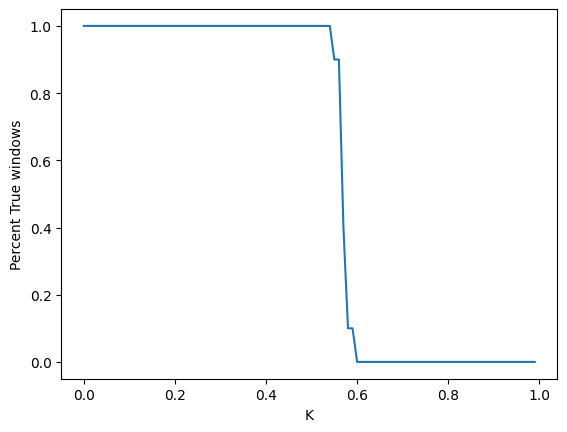

In [34]:
import matplotlib.pyplot as plt

plt.plot(K_list, true_PAK_pct)
plt.xlabel("K")
plt.ylabel("Percent True windows")
plt.show()